# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Importing a few others I want
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

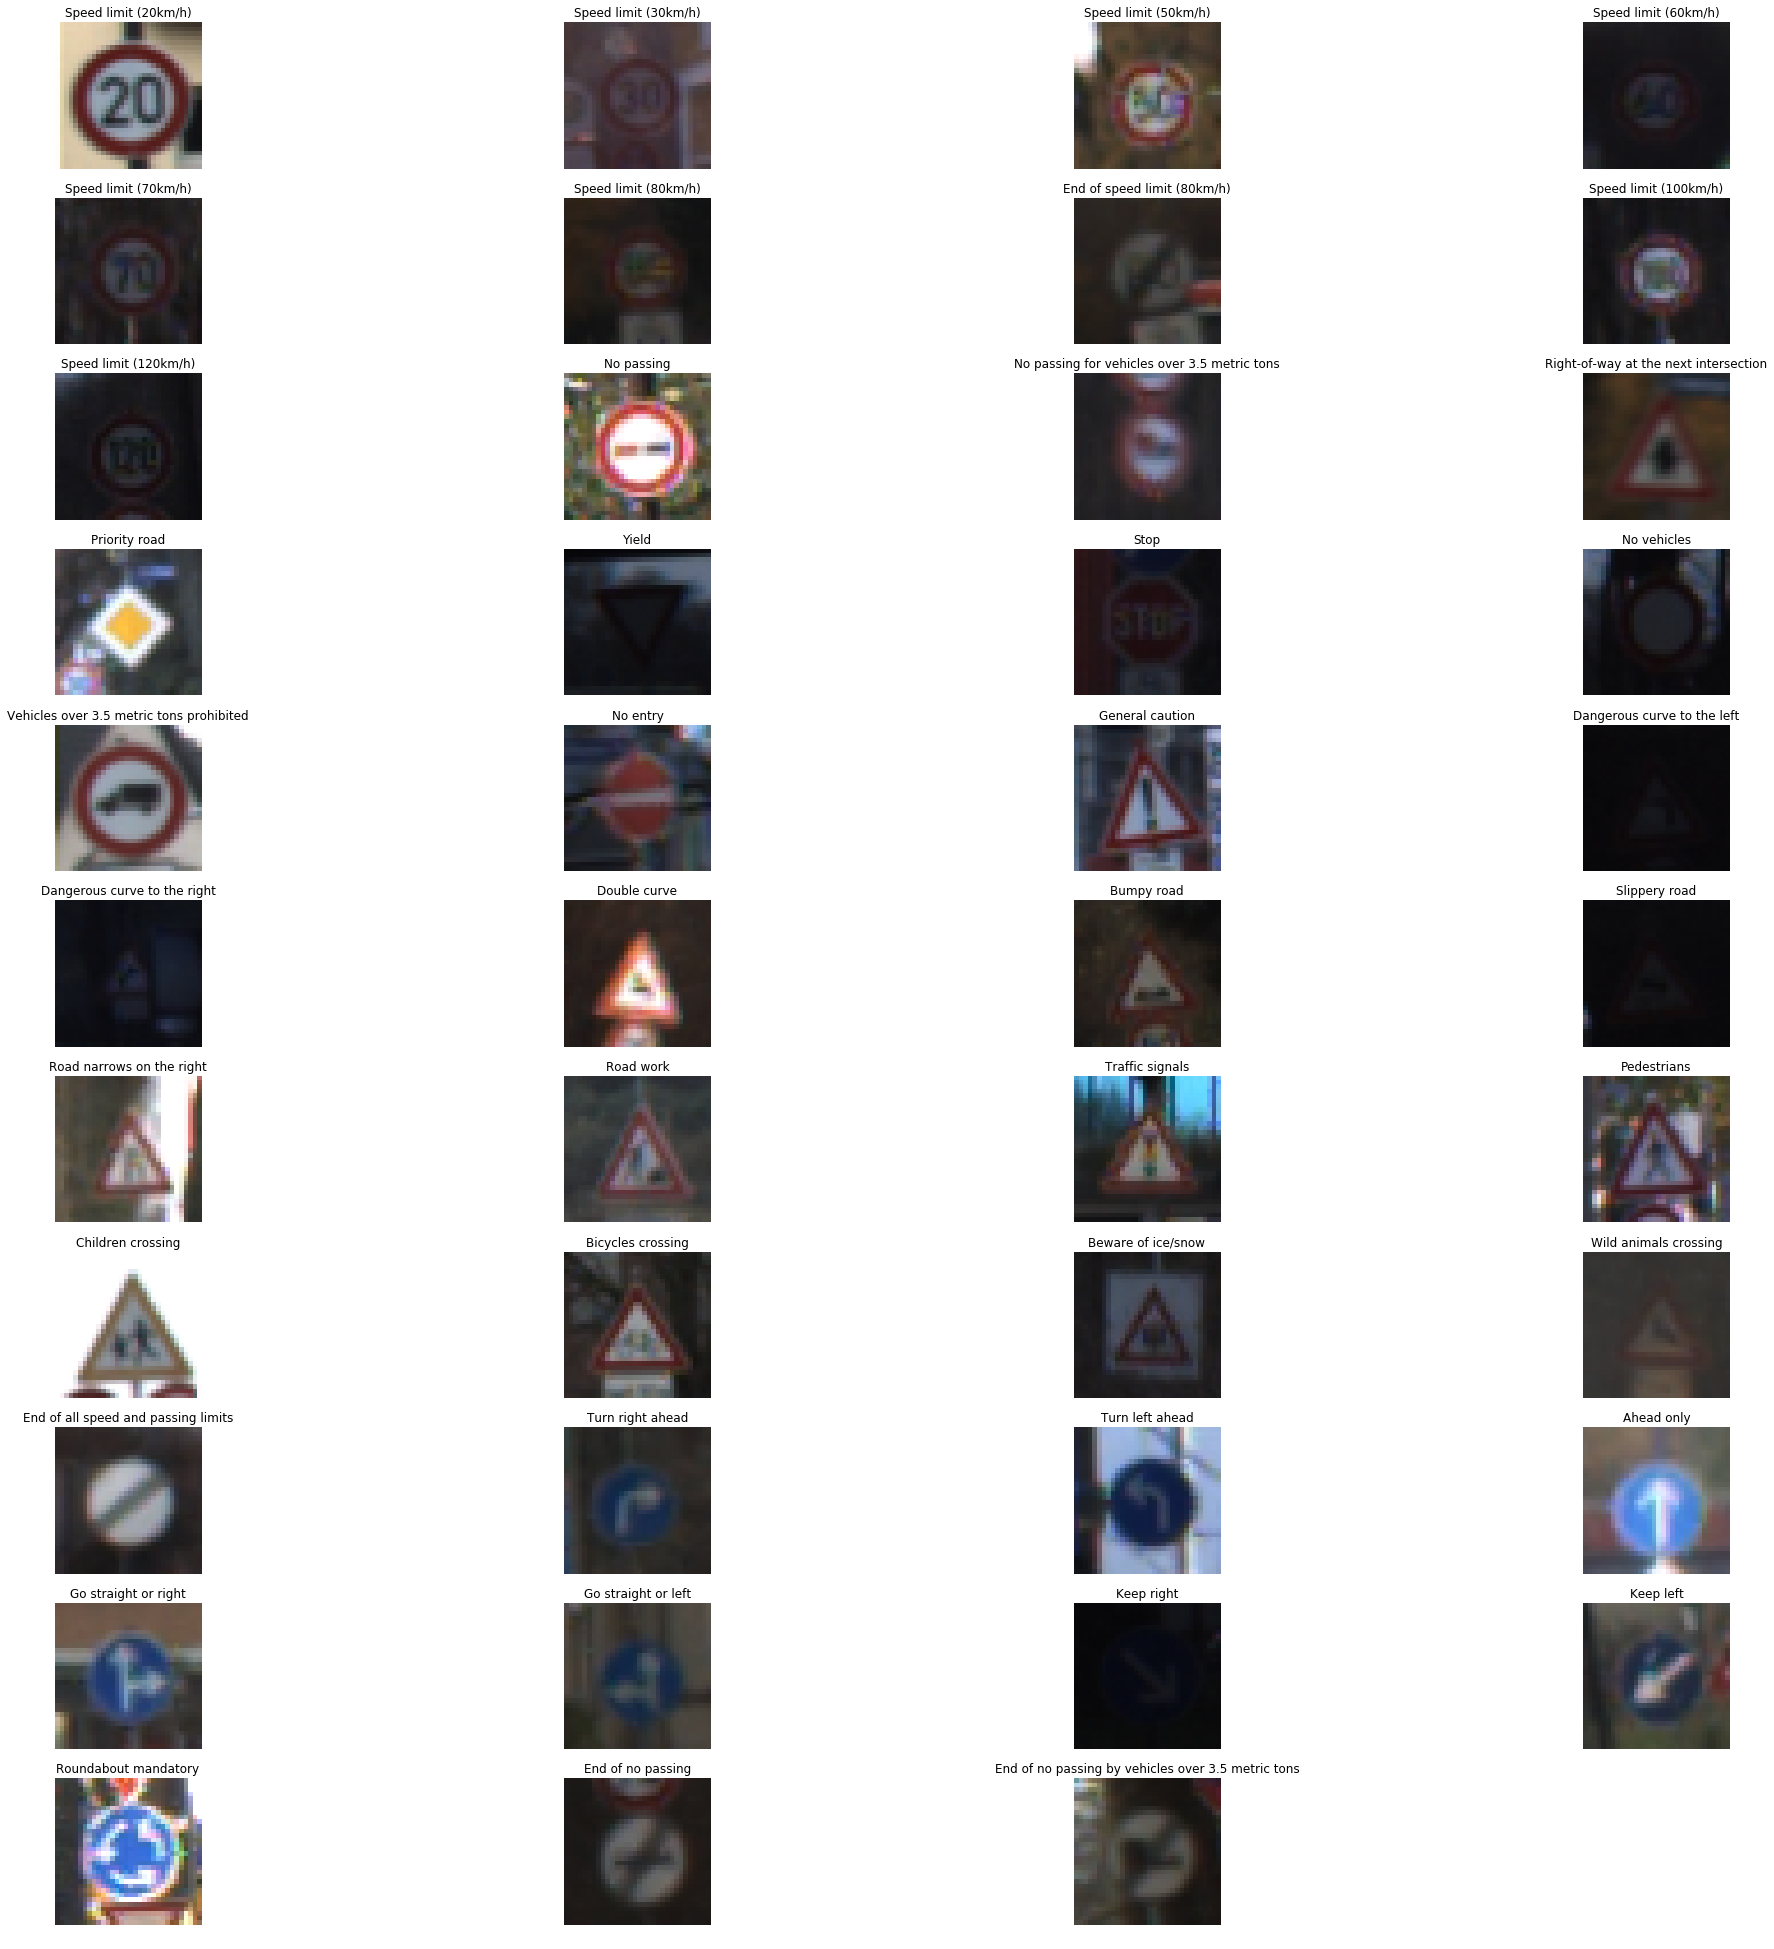

In [3]:
### Data exploration visualization code goes here.
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

class_name=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        class_name.append((row['SignName']))

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# plt.figure(figsize=(1.5,1.5))
# plt.imshow(image, cmap="gray")
# print(y_train[index])

#Plot number of images per class
num_of_samples=[]
plt.figure(figsize=(35, 35))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(class_name[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()   

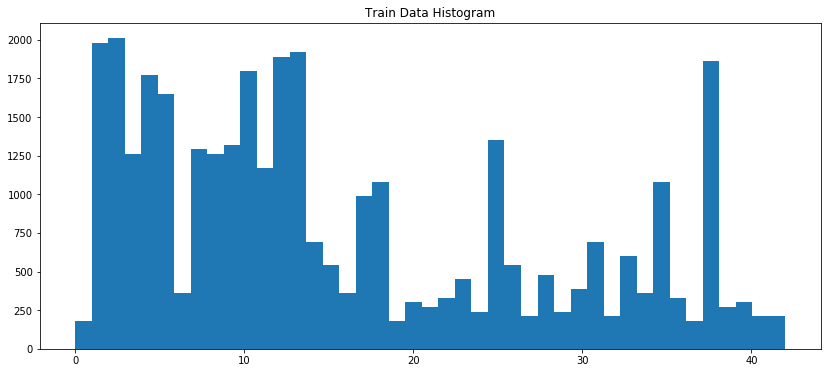

In [4]:
plt.figure(figsize=(14, 6))
plt.hist(y_train, bins = n_classes)
plt.title("Train Data Histogram")
plt.show()

## Pre-process the Data Set (normalization, grayscale, etc.)

### Answer:  Preprocessing: With orignal traning data set results of network was over fitted. Because some image class had  few no of images. After adding additional images to class with lacking images network accuracy improved a lot.  I first trained network on normalized color images, in next attempt I gray scaled images and normalized it. I found there is not much difference in accuracy but gray scaled image helped to train network faster.  

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
from numpy import newaxis
def grayscale(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)       
    return np.array(gray_images)

def normalize_image(image_data):
    x_min = np.min(image_data)
    x_max = np.max(image_data)
    X_normal = ((image_data-x_min)/(x_max-x_min)) 
    return X_normal

In [6]:
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]
# Normalize
X_train = normalize_image(X_train)
Xtrain_shape = X_train.shape
print(Xtrain_shape)

X_test = preprocess(X_test)
X_test = X_test[..., newaxis]
print('All Training and Testing data preprocessing complete.')

(34799, 32, 32, 1)
All Training and Testing data preprocessing complete.


Generating new data.
Additional data generated. Any classes lacking data now have 1009 images.
The updated number of training images = 51933


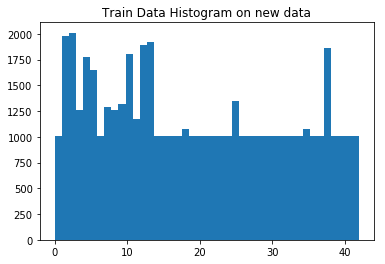

In [7]:
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to make the code below easier to distinguish
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics+200)

print('Generating new data.')

# Angles to be used to rotate images in additional data made
angles = [-12, 10, -13, 13, -15, 15]

# Iterate through each class
for i in range(len(pics_in_class)):
    
    # Check if less data than the mean
    if pics_in_class[i] < min_desired:
        
        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
        
        # Append the pictures generated for each class back to the original data
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)
print('Additional data generated. Any classes lacking data now have', min_desired, 'images.')
updated_n_train = len(X_train)
print("The updated number of training images =", updated_n_train)
plt.hist(y_train, bins = n_classes)
plt.title("Train Data Histogram on new data")
plt.show()

In [31]:
# Splitting the training dataset into training and validation data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle the data prior to splitting
X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=23)

print('Dataset successfully split for training and validation.')

Dataset successfully split for training and validation.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

<h1>Setup TensorFlow</h1>


In [32]:
from tensorflow.contrib.layers import flatten
EPOCHS = 30
BATCH_SIZE = 120

## Model Architecture
### Answer: Used LeNet CNN architecture with 2 convolutional layers and 3 fully connected layers. First I just used max pooling and my accuracy was about 91 % for 30 epochs, but top 5 probabilities showed me some of images predicted wrong because of over fitting. So I introduce drop out, which resolved over fitting issue, also helped to predict top 5 probabilities in reasonable range.  Due to gray scaling my network needed 32x32x1 input images.

In [33]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def CNN(x):
    #Truncated Normal   
    
    # Convolution Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.  
    #filter weight is (height, width, input_depth, output_depth)
    # If not using grayscale, the third number in shape would be 3
    #Define W & b for Filter size 5x5x1x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = 0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(6))
    #CNN Input = 32x32x1. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    #Non Linear Function
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob=0.7)
    
    # Convolution Layer 2
    #CNN Input = 14x14x6, Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, keep_prob=0.6)
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob=0.7)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = 0, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    #Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    #fc2 = tf.nn.dropout(fc2, keep_prob=0.7)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = 0, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


##  Answer:  I used Adam optimizer which did better than gradient descent optimizer. I tried different learning rate(From 0.01 to 0.001), drop out percentage(50 to 70), Batch size (from 100 to 250). But I found 0.001 of learning rate and 120 batch size showed best performance. I also used drop outs at conv1, fc1 and fc2. Tuned drop out percentage from 50 to 70 % at last found best performance at conv1 and fc1 with dropout rate of 70 percent. Following are my attempts to tune hyper parameters
1.  conv1(0.7)-fc1(0.7), 0.001, 150,acc: 95, Epoch 25
2. fc1(0.7)-fc2(0.7), 0.001, 150, acc: 93, Epoch 15
3. conv1(0.7)-fc1(0.7)-fc2(0.7), 0.005, 120,acc: 95, Epoch 30
4.  conv1(0.7)-fc1(0.7), 0.005, 150,acc: 95, Epoch 30

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [34]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 

### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [35]:
#Training Pipeline
rate = 0.001

logits = CNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [37]:
import time
save_file = './lenet_grayscale_final.ckpt'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.574

EPOCH 2 ...
Validation Accuracy = 0.703

EPOCH 3 ...
Validation Accuracy = 0.772

EPOCH 4 ...
Validation Accuracy = 0.816

EPOCH 5 ...
Validation Accuracy = 0.840

EPOCH 6 ...
Validation Accuracy = 0.862

EPOCH 7 ...
Validation Accuracy = 0.875

EPOCH 8 ...
Validation Accuracy = 0.883

EPOCH 9 ...
Validation Accuracy = 0.899

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.910

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.939

EPOCH 18 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 20 ...
Validation Accuracy = 0.945

EPOCH 21 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.944

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8292953849121963


(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


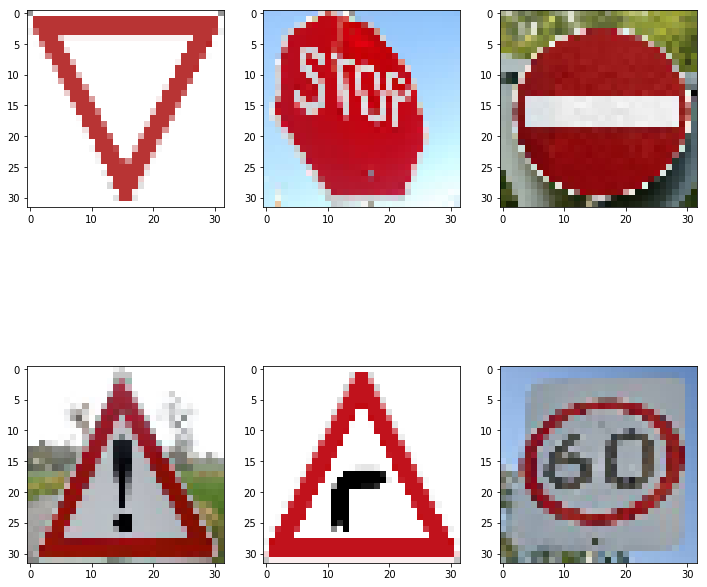

In [39]:
### Load the images and plot them here.

import tensorflow as tf
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import csv
from resizeimage import resizeimage
imagelist = os.listdir('German Traffic Sign Images/')
#Import traffic signs class names

#print (len(imagelist))
X_data = []
for i in imagelist:   
    image = mpimg.imread("German Traffic Sign Images/{}".format(i))
    #gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    resized_image = cv2.resize(image, (32,32))
    X_data.append(resized_image[:,:,0:3])
    
plt.figure(figsize=(12, 12))
for i in range(len(X_data)): 
    print(X_data[i].shape)
    plt.subplot(2, 3, i+1)
    plt.imshow(X_data[i]) 
plt.show()
    #image_resize = image.resize((32, 32))

In [40]:
# Preprocessing of Image
X_data_gray = preprocess(X_data)
X_data_gray = X_data_gray[..., newaxis]
# Normalize
X_data_normalize = normalize_image(X_data_gray)

## Predict the Sign Type for Each Image
### Answer: My model predicts all images except stop sign I am assuming the sign image angle is affecting model prediction. Prospective transform might resolve this issue.

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>
[13 34 17 18 20  3]


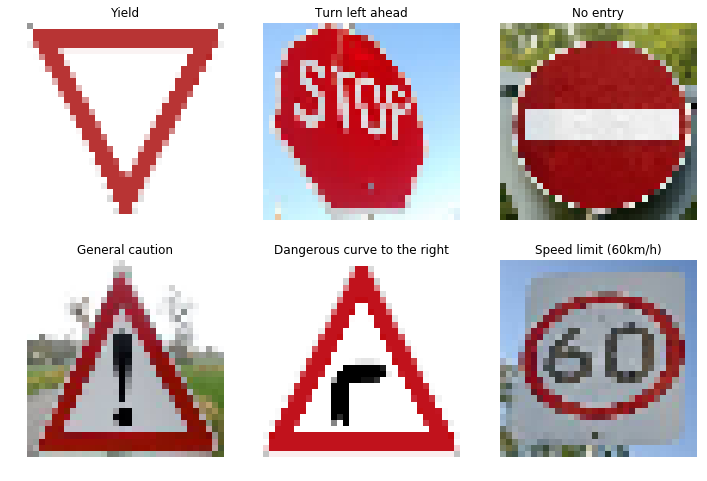

In [44]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x:X_data_normalize})
    print (type(y_pred))
    print (type(logits))
    print(y_pred)
    
plt.figure(figsize=(12, 8))
for i in range(len(X_data)):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_data[i]) 
    plt.title(class_name[y_pred[i]])
    plt.axis('off')
plt.show()

### Analyze Performance

In [48]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_data_normalize, y_pred)

print('Test Accuracy on New Images: {}'.format(test_accuracy))

Test Accuracy on New Images: 0.8333333730697632


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [46]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#print(y_pred)
#softmax_logits = tf.nn.softmax(logits)
#top_5_probablity = tf.nn.top_k(softmax_logits, 5)
#with tf.Session() as sess:
softmax_logits = tf.nn.softmax(logits)
#print(softmax_logits.shape)
top_5_probablity = tf.nn.top_k(softmax_logits, 5)
with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_5 = sess.run(top_5_probablity, feed_dict={x: X_data_normalize, y: y_pred}) 
    print(top_5)
for i in range(len(top_5[0])):
    print('Image', i, 'probabilities:', top_5[0][i], '\n and predicted classes:', top_5[1][i])       

TopKV2(values=array([[  1.00000000e+00,   1.01180720e-22,   1.89711396e-25,
          1.11140370e-25,   2.83471311e-26],
       [  7.33902991e-01,   1.37716696e-01,   9.76180136e-02,
          2.36625094e-02,   3.24762426e-03],
       [  1.00000000e+00,   3.16186623e-20,   1.74776833e-27,
          1.80769575e-29,   1.57027602e-31],
       [  9.95155334e-01,   4.76176944e-03,   6.75873816e-05,
          8.13811039e-06,   3.64004654e-06],
       [  6.38596654e-01,   3.49306583e-01,   1.20967841e-02,
          6.76825280e-08,   1.88139104e-08],
       [  8.63354266e-01,   6.89365864e-02,   1.70536898e-02,
          1.42732160e-02,   1.01195602e-02]], dtype=float32), indices=array([[13, 35,  9,  1, 12],
       [34, 14, 33,  3, 17],
       [17, 14, 34, 13,  1],
       [18, 26, 27, 31, 20],
       [20, 23, 28, 30, 11],
       [ 3,  5, 29,  2,  7]]))
Image 0 probabilities: [  1.00000000e+00   1.01180720e-22   1.89711396e-25   1.11140370e-25
   2.83471311e-26] 
 and predicted classes: [13 35 

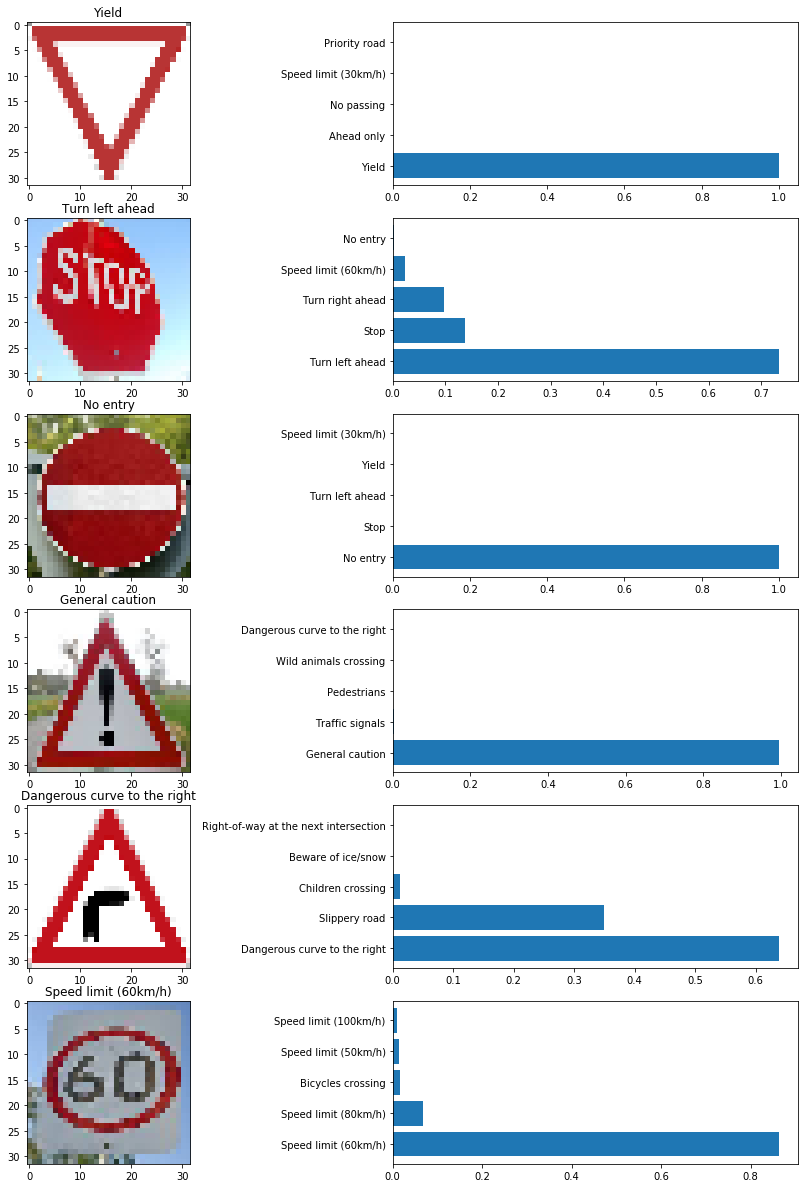

In [47]:
plt.figure(figsize=(16, 21))
for i in range(len(X_data)):
    plt.subplot(len(X_data), 2, 2*i+1)
    plt.imshow(X_data[i]) 
    plt.title(class_name[y_pred[i]])
    #plt.axis('off')
    plt.subplot(len(X_data), 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top_5.values[i, :])
    labs=[class_name[j] for j in top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

## Answer: In top 5 probabilities my model predicts Yield, no entry and general caution signs confidently. For dangerous curve to right sign it predicts by 65 % then 35 % for slippery road and 5 % for children crossing and surprisingly all three images are in triangular form. Model predicts 60 Kmh sign by 80 % which is far higher than reaming 4 probabilities. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 